# Inaugural Project 1

# Imports

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We followed these steps:
    Defined the parameters given in the exercise
    Wrote up the utility function
    Wrote up the initial utility
    Settings for figure
    Plot of the endowment
    Plot the edgeworth box and the pareto improvements 

The Edgeworth Box itself, marked by black lines, represents all possible allocations of two goods (or resources) x1 and x2 between two parties, A and B. The dimensions of the box are determined by the total amount of each good available, w_1\bar and w_2\bar, both set to 1.0 in this scenario.

The initial endowment of party A is represented by a black square marker. This point indicates the starting allocation of goods between the two parties, with A starting with 0.8 of x1 and 0.3 of x2.

The Pareto improvements are shown as blue dots. These are allocations where both parties' utilities are at least as high as their utilities at the initial endowment, indicating that both parties are better off (or at least not worse off) compared to their initial positions. The utility functions for A and B (uAuA and uBuB) are based on Cobb-Douglas preferences, with parameters αα and ββ determining the weight each party places on goods x1 and x2.


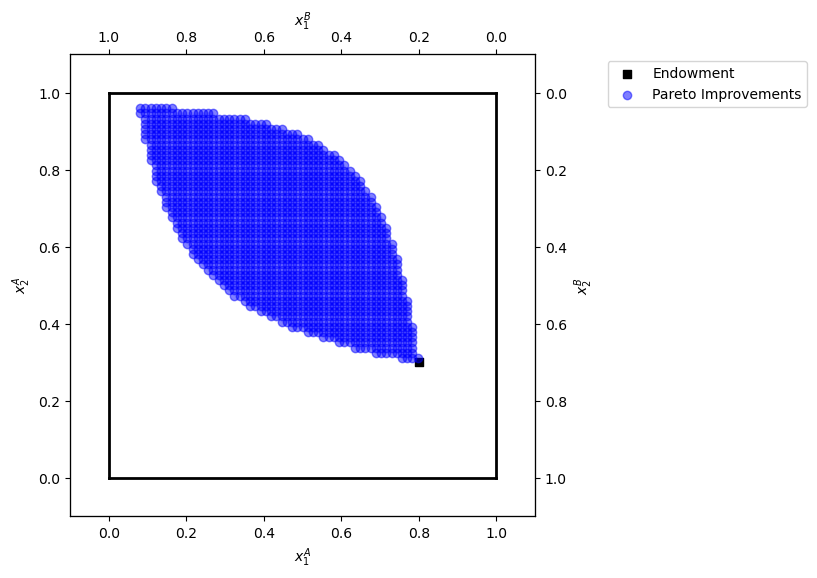

In [114]:
# Parameters
alpha = 1/3
beta = 2/3
N = 75  # Grid size for the plot
omega_A1 = 0.8
omega_A2 = 0.3
w1bar = 1.0
w2bar = 1.0

# Utility functions
def uA(x1, x2):
    return (x1**alpha) * (x2**(1-alpha))

def uB(x1, x2):
    return (x1**beta) * (x2**(1-beta))

# Initial utility
uA_initial = uA(omega_A1, omega_A2)
uB_initial = uB(w1bar - omega_A1, w2bar - omega_A2)

# Figure setup
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting endowment
ax_A.scatter(omega_A1, omega_A2, marker='s', color='black', label='Endowment')

# Plotting Edgeworth Box
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Calculating and plotting the Pareto improvements
x_A1 = np.linspace(0, w1bar, N)
x_A2 = np.linspace(0, w2bar, N)
X_A1, X_A2 = np.meshgrid(x_A1, x_A2)

U_A = uA(X_A1, X_A2)
U_B = uB(w1bar-X_A1, w2bar-X_A2)

pareto_improvement_mask = (U_A >= uA_initial) & (U_B >= uB_initial)

ax_A.scatter(X_A1[pareto_improvement_mask], X_A2[pareto_improvement_mask], color='blue', alpha=0.5, label='Pareto Improvements')

# Adjusting limits and showing plot
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.show()

# Question 2

We use the following steps in the code:
1.	Define parameters and endowment
2.	Define price range for p1
3.	Define demand function for consumer A and B
4.	Calculate the errors for the market clearing conditions. 

The code calculates and displays the errors in the market clearing conditions for two goods across a range of prices for the first good (p1), while treating the price of the second good (p2) as the numeraire (fixed at 1). The errors are calculated based on the demand functions for consumers A and B, given their initial endowments and preferences (represented by α and β), and a range of prices for good 1 (p1) from 0,5 to 2,5.

The output shows the errors in the market clearing conditions for the first five price levels in the specified range. Each row in the output corresponds to a specific price of p1, with the first column representing the error in the market for good 1 (ϵ1) and the second column for good 2 (ϵ2). The errors represent the difference between the total demanded quantities of each good and the total endowments in the economy for those goods. Positive values indicate excess demand, while negative values indicate excess supply.

From the first five rows, we can observe a pattern:
•	The error for good 1 (ϵ1) is positive in all cases, suggesting excess demand for good 1 across these price levels.
•	The error for good 2 (ϵ2) is negative, indicating excess supply for good 2 at these price levels.
This outcome suggests that, within the examined price range for p1, there's consistently more demand for good 1 than is available from the initial endowments, while the opposite is true for good 2. 


In [115]:
# Given parameters and initial endowments

omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2
p2 = 1  # Numeraire

# Define the price range for p1
N = 75
p1_range = np.linspace(0.5, 2.5, N)

# Demand functions for consumer A and B
def demand_A(p1, omega_A1, omega_A2, alpha, p2=1):
    xA1 = alpha * (omega_A1 * p1 + omega_A2 * p2) / p1
    xA2 = (1 - alpha) * (omega_A1 * p1 + omega_A2 * p2) / p2
    return xA1, xA2

def demand_B(p1, omega_B1, omega_B2, beta, p2=1):
    xB1 = beta * (omega_B1 * p1 + omega_B2 * p2) / p1
    xB2 = (1 - beta) * (omega_B1 * p1 + omega_B2 * p2) / p2
    return xB1, xB2

# Calculate the errors for the market clearing conditions
errors = np.zeros((N, 2))  # Store errors for epsilon1 and epsilon2
for i, p1 in enumerate(p1_range):
    xA1, xA2 = demand_A(p1, omega_A1, omega_A2, alpha)
    xB1, xB2 = demand_B(p1, omega_B1, omega_B2, beta)
    
    epsilon1 = xA1 + xB1 - (omega_A1 + omega_B1)
    epsilon2 = xA2 + xB2 - (omega_A2 + omega_B2)
    
    errors[i] = [epsilon1, epsilon2]

# Display the first 5 rows of errors as a sample
print(errors[:5])

[[ 0.53333333 -0.26666667]
 [ 0.47521368 -0.25045045]
 [ 0.42276423 -0.23423423]
 [ 0.3751938  -0.21801802]
 [ 0.33185185 -0.2018018 ]]


# Question 3

We use numerical optimization techniques to find the equilibrium price (p1)in a market with two goods and two types of consumers. It defines demand functions for each consumer type and calculates market clearing errors based on the total quantity demanded and available quantities. The minimize_scalar function from scipy.optimize is then employed to minimize these errors and determine the equilibrium price within a specified range. Finally, the script displays the computed equilibrium price.

The market clearing price is found to be p1=0,94.

In [147]:
# Demand functions for consumers A and B for goods 1 and 2
def demand_A1(p1, omega_A1=omega_A1, omega_A2=omega_A2, alpha=alpha):
    return alpha * ((p1 * omega_A1 + p2 * omega_A2) / p1)

def demand_A2(p1, omega_A1=omega_A1, omega_A2=omega_A2, alpha=alpha):
    return (1 - alpha) * ((p1 * omega_A1 + p2 * omega_A2) / p2)

def demand_B1(p1, omega_A1=omega_A1, beta=beta):
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2  # Calculated based on A's endowment
    return beta * ((p1 * omega_B1 + p2 * omega_B2) / p1)

def demand_B2(p1, omega_A1=omega_A1, beta=beta):
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2  # Calculated based on A's endowment
    return (1 - beta) * ((p1 * omega_B1 + p2 * omega_B2) / p2)

# Market clearing condition errors calculation
def market_clearing_errors(p1):
    xA1 = demand_A1(p1)
    xA2 = demand_A2(p1)
    xB1 = demand_B1(p1)
    xB2 = demand_B2(p1)
    epsilon1 = xA1 + xB1 - 1
    epsilon2 = xA2 + xB2 - 1
    return abs(epsilon1) + abs(epsilon2)

# Use minimize_scalar to find the p1 that minimizes the market clearing error
result = minimize_scalar(market_clearing_errors, bounds=(0.01, 5), method='bounded')

# Display the results
market_clearing_p1 = result.x if result.success else None
market_clearing_p1
 

# Calculate demands at the market clearing price
demand_A1_3 = demand_A1(market_clearing_p1)
demand_B1_3 = demand_B1(market_clearing_p1)
demand_A2_3 = demand_A2(market_clearing_p1)
demand_B2_3 = demand_B2(market_clearing_p1)

market_clearing_p1, demand_A1_3, demand_A2_3, demand_B1_3, demand_B2_3, 

(0.9444459400418668,
 0.3725488519355949,
 0.7037045013556623,
 0.6274501979216649,
 0.2962963960027911)

# Question 4a

Consumer A's utility in an exchange economy model by finding the optimal price. It iterates through a defined price range, calculating demands and utility at each price point. Afterward, it extracts the distribution of goods for both consumers at the optimal price and prints the results for maximum utility and optimal price for p1 to be 0,78. The optimal consumption for consumer A is 0,48 for good 1 and 0,35 for good 2, and the optimal consumption for consumer B is 0,52 for good 1 and 0,65 for good 2.


In [150]:
# Import your own code
from exchange_economy import ExchangeEconomyClass
# Initialize the economy
economy = ExchangeEconomyClass()

# Set up the price range
N = 75  
P1 = np.linspace(0.5, 2.5, N)
# Set up the empty sets
max_utility =  -np.inf
best_p1 = np.nan

# Running the max loop
for p1 in P1:
    xB1_optimal4a, xB2_optimal4a = economy.demand_B(p1)
    xA1_optimal4a = 1-xB1_optimal4a
    xA2_optimal4a = 1-xB2_optimal4a

    utility = economy.utility_A(xA1, xA2)
    if utility > max_utility:
        max_utility = utility
        best_p1 = p1
        best_xA1 = xA1_optimal4a
        best_xA2 = xA2_optimal4a

# Prints the parameters
print("Maximum utility A:", max_utility)
print("Optimal p1:", best_p1)
print("xA1 and xA2", xA1_optimal4a, xA2_optimal4a )
print("xB1 and xB2", xB1_optimal4a, xB2_optimal4a )

Maximum utility A: 0.529133659749837
Optimal p1: 0.5
xA1 and xA2 0.48 0.35
xB1 and xB2 0.52 0.65


# Question 4b

The resolution of exercise 4b, where consumer A is allowed to choose any positive price p1 to maximize her utility under the condition that consumer B's utility is not diminished compared to their initial endowment, produces following outcome outcomes:

The optimal price p1 was found to be approximately 0,77. At this price, consumer A achieves an optimal utility of about 0.59, reflecting a favorable situation for her within the given constraints.

The allocation of goods between the two consumers at this price point reveals that consumer A will consume approximately 0.36 of good 1 and 0.75 of good 2, indicating a significant share of both goods leaning towards consumer A's preference. Conversely, consumer B is allocated about 0.64 of good 1 and 0.25 of good 2, ensuring that consumer B's utility is maintained at least at the level of their initial endowment, fulfilling the market maker's constraint.

In [153]:
# Utility functions
def uA(x1, x2, alpha=1/3):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2, beta=2/3):
    return x1**beta * x2**(1-beta)

def demand_B(p1, omega_1B=1-omega_A1, omega_2B=1-omega_A2, beta=beta, p2=p2):
    xB1_star = beta * ((omega_B1 + p1/p2*omega_B2) / p1)
    xB2_star = (1-beta) * ((omega_B1 + p1/p2*omega_B2) / p2)
    return xB1_star, xB2_star

# Initial endowments
omega_A = np.array([0.8, 0.3])
omega_B = np.array([0.2, 0.7])

# Initial utilities
initial_uA = uA(omega_A[0], omega_A[1])
initial_uB = uB(omega_B[0], omega_B[1])

# Objective function to maximize A's utility
def objective(p1, return_neg=True):
    xB1, xB2 = demand_B(p1)
    xA1, xA2 = 1 - xB1, 1 - xB2
    if uB(xB1, xB2) >= initial_uB:
        if return_neg:
            return -uA(xA1, xA2)  # Negative because we're minimizing
        else:
            return uA(xA1, xA2)
    else:
        return np.inf

# Constraint to ensure p1 > 0
constraints = ({'type': 'ineq', 'fun': lambda p1: p1})

# Optimization over p1
result = minimize(fun=objective, x0=np.array([1]), bounds=[(0.01, np.inf)], constraints=constraints)

if result.success:
    optimal_p1 = result.x[0]
    optimal_uA = objective(optimal_p1, return_neg=False)
    optimal_xB1_4b, optimal_xB2_4b = demand_B(optimal_p1)
    optimal_xA1_4b, optimal_xA2_4b = 1 - optimal_xB1_4b, 1 - optimal_xB2_4b

    print(f"Optimal p1: {optimal_p1:.4f}")
    print(f"Optimal utility for A: {optimal_uA:.4f}")
    print(f"Optimal allocation for A: Good 1: {optimal_xA1_4b:.4f}, Good 2: {optimal_xA2_4b:.4f}")
    print(f"Optimal allocation for B: Good 1: {optimal_xB1_4b:.4f}, Good 2: {optimal_xB2_4b:.4f}")
else:
    print("Optimization was unsuccessful.")

Optimal p1: 0.7720
Optimal utility for A: 0.5892
Optimal allocation for A: Good 1: 0.3606, Good 2: 0.7532
Optimal allocation for B: Good 1: 0.6394, Good 2: 0.2468


# Question 5a
The provided code solves problem 5a by iterating over potential allocations of goods xA1 and xA2 for consumer A within the feasible set C, where both consumers remain at least as well off as with their initial endowments. It checks each allocation's utility against initial levels, storing valid options in xlist. The optimal allocation maximizing A's utility is then identified from this list, with results printed for the best utility values and corresponding goods allocations for both consumers A and B.
The optimal allocation for consumer A within set C is 0,56 of good 1 and 0,85 for good 2.

In [134]:
# Initialize an empty list to store valid combinations
xlist=[]

# Loop through possible combinations of x_A1 and x_A2

for x_A1 in np.linspace(0,1,N+1):
    for x_A2 in np.linspace(0,1,N+1):
        x_B1 = 1-x_A1
        x_B2 = 1-x_A2
        # Compute utility for consumers A and B
        uA = economy.utility_A(x_A1,x_A2)
        uB = economy.utility_B(x_B1,x_B2)
        # Check if the combination satisfies initial conditions
        if uA >= uA_initial and uB >= uB_initial:
            xlist.append((x_A1,x_A2))

# Extract x and y values from the list
x_values, y_values = zip(*xlist)

# Use the list that saves values in C "xlist"
uA_C = -np.inf
x_A1_C= np.nan
x_A2_C= np.nan

# We verify that the new allocation results in a utility lower than the initial allocation specified in the assignment.
for x_A1, x_A2 in xlist:
    if economy.utility_A(x_A1,x_A2) > uA_C:
        uA_C = economy.utility_A(x_A1,x_A2)
        x_A1_C= x_A1
        x_A2_C= x_A2

print(f'uB = {economy.utility_B(1-x_A1_C,1-x_A2_C):.3f} uA = {uA_C:.3f} (xA1_C,xA2_C) = ({x_A1_C:.3f}, {x_A2_C:.3f})')

uB = 0.305 uA = 0.742 (xA1_C,xA2_C) = (0.560, 0.853)


# Question 5b
To answer this question we go through the following steps:
1. Define Utility Functions (same as in question 5a).
2. Calculate Initial Utilities (same as in question 5a).
3. Optimization Problem Setup, i.e. formulate the optimization problem to maximize A's utility subject to the constraint that B's utility is not less than its initial level, with xA1 and xA2 unrestricted but within the range [0,1].
4. Solve the Optimization Problem: Use a numerical optimization method  to find the optimal xA1 and xA2.

If no further restrictions are imposed the allocation is 0,58 for good 1 and 0,84 for good 2 for consumer A. 

In [154]:


# Initial utilities to be maintained for B
initial_uB = uB(omega_B1, omega_B2)

# Objective function for maximization
def objective(x):
    x_A1, x_A2 = x
    return -uA(x_A1, x_A2)  # Negative because we minimize in the scipy function

# Constraints to ensure A's choices do not make B worse off than initially
def constraint(x):
    x_A1, x_A2 = x
    x_B1 = 1 - x_A1
    x_B2 = 1 - x_A2
    return uB(x_B1, x_B2) - initial_uB

# Bounds for A's consumption
bounds = ((0, 1), (0, 1))

# Non-linear constraint for B's utility
cons = ({'type': 'ineq', 'fun': constraint})

# Starting guess for optimization
x0 = [omega_A1, omega_A2]

# Run optimization
result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)

if result.success:
    optimal_xA1_5b, optimal_xA2_5b = result.x
    optimal_uA = -result.fun  # Convert back because of the minimization
    print(f"Optimal allocation for A: xA1 = {optimal_xA1_5b:.4f}, xA2 = {optimal_xA2_5b:.4f}, Utility = {optimal_uA:.4f}")
else:
    print("Optimization was unsuccessful. Reason:", result.message)

Optimal allocation for A: xA1 = 0.5757, xA2 = 0.8444, Utility = 0.7432


# Question 6a

The steps for solving question 6.a will be:

1) Start by defining the aggregate utility function. 

2) Then we use an optimization solver to find the values for x_1A and x_2A that maximizes the aggregate utility.

3) We execute the optimization solver with the initial endowments and the defined constraints to find the optimal allocation.


In [143]:

# Utility functions
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2):
    return x1**beta * x2**(1-beta)

# Objective function: Maximizing the sum of utilities of A and B
def objective(x):
    xA1, xA2 = x
    xB1, xB2 = 1 - xA1, 1 - xA2
    return -(uA(xA1, xA2) + uB(xB1, xB2))  # Negative because we minimize

# Initial guess
x0 = np.array([0.5, 0.5])

# Bounds for xA1 and xA2
bounds = ((0, 1), (0, 1))

# Optimization
result = minimize(objective, x0, bounds=bounds, method='SLSQP')

# Display the resulting allocation
result.x


array([0.33341166, 0.66658831])

Now that A and B’s consumption is chosen by a utilitarian social planner the resulting allocation is 0.333 for good 1 and 0.667 for good 2. 

# Question 6b

Overall difference between question 3,4,5 and 6

It can be seen that the social planner will pick an allocation in question 6a that is more favourable towards consumer B. In comparison, when the two consumers trade "freely", consumer A ends up better off than in the social planner's allocation choice. We also know that when consumer B is the price taker in Question 4 consumer A gets a better allocation compared to in question 3 and 5 (since he is the price-setter).

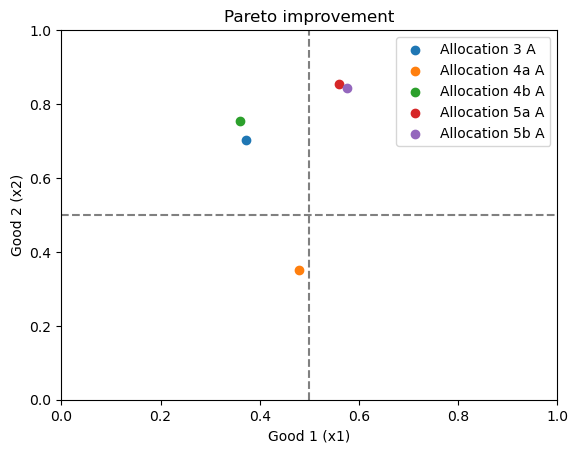

In [159]:
import matplotlib.pyplot as plt

# Define total amounts of each good
total_x1 = 1
total_x2 = 1

# Define allocations for Consumer A from each task
allocations = {
    'Allocation 3': (demand_A1_3, demand_A2_3),
    'Allocation 4a': (xA1_optimal4a, xA2_optimal4a),
    'Allocation 4b': (optimal_xA1_4b, optimal_xA2_4b),
    'Allocation 5a': (x_A1_C, x_A2_C),
    'Allocation 5b': (optimal_xA1_5b, optimal_xA2_5b)
}

# Initialize plot
fig, ax = plt.subplots()

# Plot the allocations for Consumer A
for task, (xA1, xA2) in allocations.items():
    # Compute corresponding allocations for Consumer B
    xB1 = total_x1 - xA1
    xB2 = total_x2 - xA2
    ax.scatter(xA1, xA2, label=f'{task} A', marker='o')  # Mark Consumer A's allocation

# Set plot limits and labels
ax.set_xlim(0, total_x1)
ax.set_ylim(0, total_x2)
ax.set_xlabel('Good 1 (x1)')
ax.set_ylabel('Good 2 (x2)')
ax.axhline(0.5, color='gray', linestyle='--')
ax.axvline(0.5, color='gray', linestyle='--')
ax.set_title('Pareto improvement')

# Add a legend
ax.legend()

# Show the plot
plt.show()

# Question 7

Drawing a set W with 50 elements where ω1A and ω2A are uniformly distributed between 0 and 1

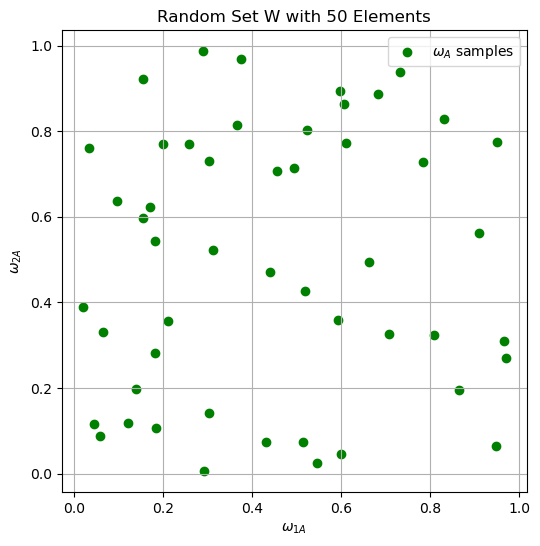

In [33]:

np.random.seed(42)  # For reproducibility

# Generating 50 samples for ω1A and ω2A
omega1A_samples = np.random.uniform(0, 1, 50)
omega2A_samples = np.random.uniform(0, 1, 50)

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(omega1A_samples, omega2A_samples, color='green', label='$\omega_A$ samples')
ax.set_xlabel('$\omega_{1A}$')
ax.set_ylabel('$\omega_{2A}$')
ax.set_title('Random Set W with 50 Elements')
ax.grid(True)
ax.legend()

plt.show()


# Question 8
To answer this question we go through the following steps:
1. Generate a random set of initial endowments drawn from a uniform distribution U(0,1).
2. For each pair of endowments in W, calculate the market equilibrium allocations for both goods for consumers A and B, given the utility functions and the constraint that the total amount of each good in the economy equals 1.
3. Plot these allocations in an Edgeworth box to visualize the market equilibria.

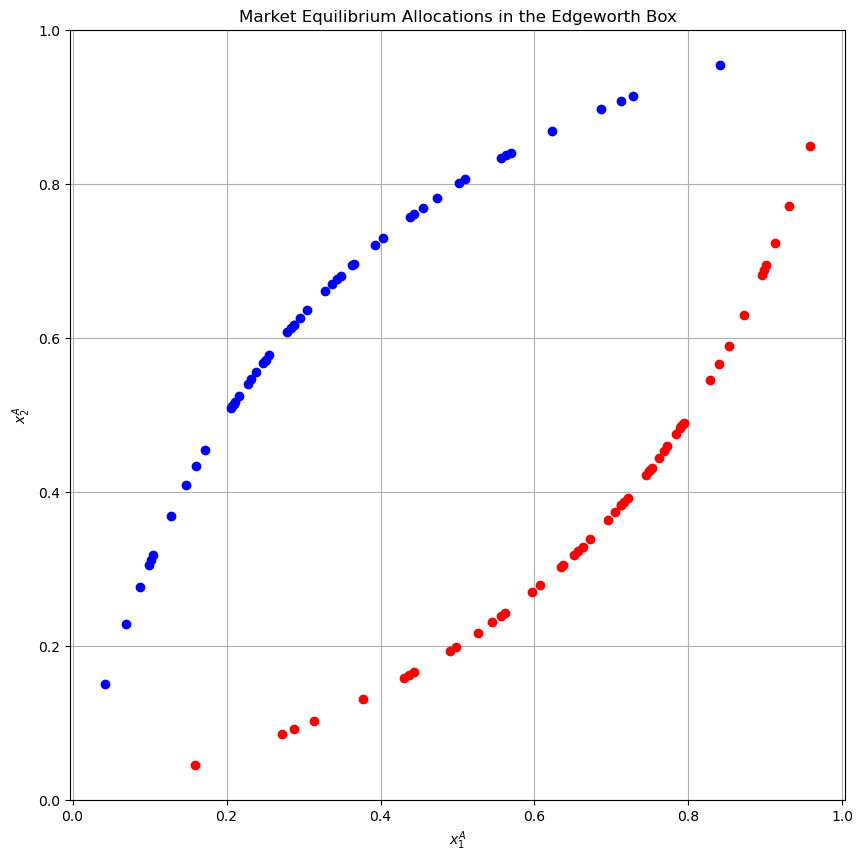

In [4]:
# Calibration parameters
num_endowments = 50

# Generate random endowments
np.random.seed(0)  # For reproducibility
omega_A = np.random.uniform(0, 1, (num_endowments, 2))
omega_B = 1 - omega_A  # Total endowment of each good is always 1

# Utility functions
def u_A(x1, x2):
    return x1**alpha * x2**(1-alpha)

def u_B(x1, x2):
    return x1**beta * x2**(1-beta)

# Market equilibrium function
def market_equilibrium(omega):
    def objective(p):
        # Inverse demand functions derived from utility maximization
        xA1_star = alpha * (omega[0] + p * omega[1]) / p
        xB1_star = beta * ((1 - omega[0]) + p * (1 - omega[1])) / p
        # Market clearing condition error for good 1
        error = np.abs(xA1_star + xB1_star - 1)
        return error
    
    # Find p1 that minimizes the market clearing condition error
    res = minimize(objective, 0.5, bounds=[(0.01, 5)])
    p1_star = res.x[0]
    
    # Calculate equilibrium allocations using p1_star
    xA1_star = alpha * (omega[0] + p1_star * omega[1]) / p1_star
    xA2_star = (1 - alpha) * (omega[0] + p1_star * omega[1])
    xB1_star = beta * ((1 - omega[0]) + p1_star * (1 - omega[1])) / p1_star
    xB2_star = (1 - beta) * ((1 - omega[0]) + p1_star * (1 - omega[1]))
    
    return xA1_star, xA2_star, xB1_star, xB2_star

# Plot in the Edgeworth box
plt.figure(figsize=(10, 10))
for omega in omega_A:
    xA1_star, xA2_star, xB1_star, xB2_star = market_equilibrium(omega)
    plt.plot(xA1_star, xA2_star, 'bo')  # Plot A's allocation
    plt.plot(xB1_star, xB2_star, 'ro')  # Plot B's allocation

plt.title('Market Equilibrium Allocations in the Edgeworth Box')
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.grid(True)
plt.show()
